In [0]:
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
from keras.datasets import mnist
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
# application (model) imports
from keras import applications
import tensorflow as tf

Using TensorFlow backend.


In [0]:
#Here we import libraries nessesary to work with tensorflow datasets
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

#Here we load the training part of the dataset and save the images to x_train and labels to y_train

caltech101_train = tfds.load('caltech101', split='train[:10%]',download=True, batch_size=-1)
caltech101_train = tfds.as_numpy(caltech101_train) 
x_train, y_train = caltech101_train["image"], caltech101_train["label"] # seperate the x and y
#Here we load a small  part (10%) of the flowerds test dataset and save the images to x_test and labels to y_test

caltech101_test = tfds.load('caltech101', split='test[:5%]',download=True,batch_size=-1)
caltech101_test = tfds.as_numpy(caltech101_test) 
x_test, y_test = caltech101_test["image"], caltech101_test["label"] # seperate the x and y

Shuffling and writing examples to /root/tensorflow_datasets/caltech101/3.0.0.incompleteAC9KQ8/caltech101-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/caltech101/3.0.0.incompleteAC9KQ8/caltech101-test.tfrecord


Dataset caltech101 downloaded and prepared to /root/tensorflow_datasets/caltech101/3.0.0. Subsequent calls will reuse this data.


(306, 377, 604, 3)


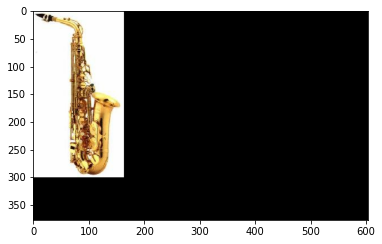

In [0]:
plt.imshow(x_train[10])
print(x_train.shape)

In [0]:
import gc
gc.collect()

3076

In [0]:
#changing to categorical


In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
len(y_train[0])

102

In [0]:
#Reshaping the data
x_train = x_train.astype('float32')
x_train = x_train / 255.0

#Reshaping the data
x_test = x_test.astype('float32')
x_test = x_test / 255.0

In [0]:
input_shape = (377,604,3)
num_classes=102
model = tf.keras.applications.ResNet101V2(
    include_top=False,
    weights= "imagenet",
    input_tensor=None,
    input_shape=None,
    pooling='avg',
    classes=1000,
    classifier_activation="softmax",
)
predictions = Dense(num_classes, activation='softmax')(model.output)
model = Model(inputs = model.input, outputs=predictions)

171319296/171317808 [==============================] - 2s 0us/step


In [0]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, None, None, 6 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [0]:

#Experiment  with momentum m=0.9 and learning rate lr=0.01

In [0]:
opt = SGD(lr=0.01, momentum=0.9)

In [0]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
import gc
gc.collect()

1951

In [0]:
#Fit the model for 10 epochs (0 to 10) and batch size of 4

In [0]:
model.fit(x_train, y_train, batch_size=4, epochs=10, verbose=True, validation_split=.1)

Epoch 1/10
69/69 [==============================] - 1251s 18s/step - loss: 4.7328 - accuracy: 0.0036 - val_loss: 30.2403 - val_accuracy: 0.0645
Epoch 2/10
69/69 [==============================] - 1248s 18s/step - loss: 4.5728 - accuracy: 0.0109 - val_loss: 504.0683 - val_accuracy: 0.0000e+00
Epoch 3/10
69/69 [==============================] - 1249s 18s/step - loss: 4.5152 - accuracy: 0.0145 - val_loss: 80.0490 - val_accuracy: 0.0000e+00
Epoch 4/10
69/69 [==============================] - 1249s 18s/step - loss: 4.5336 - accuracy: 0.0218 - val_loss: 4.7945 - val_accuracy: 0.0323
Epoch 5/10
69/69 [==============================] - 1248s 18s/step - loss: 4.4734 - accuracy: 0.0327 - val_loss: 166.8286 - val_accuracy: 0.0000e+00
Epoch 6/10
69/69 [==============================] - 1250s 18s/step - loss: 4.3359 - accuracy: 0.0473 - val_loss: 4.5439 - val_accuracy: 0.0323
Epoch 7/10
69/69 [==============================] - 1248s 18s/step - loss: 4.2338 - accuracy: 0.0473 - val_loss: 10.1359 - v

In [0]:
#Fit the model for 10 epochs (10 to 20) and batch size of 4

In [0]:
model.fit(x_train, y_train, batch_size=4, epochs=10, verbose=True, validation_split=.1)

Epoch 1/10
69/69 [==============================] - 1256s 18s/step - loss: 3.8862 - accuracy: 0.1127 - val_loss: 7.1015 - val_accuracy: 0.0968
Epoch 2/10
69/69 [==============================] - 1250s 18s/step - loss: 3.7950 - accuracy: 0.0982 - val_loss: 22.5842 - val_accuracy: 0.0968
Epoch 3/10
69/69 [==============================] - 1245s 18s/step - loss: 3.6377 - accuracy: 0.1345 - val_loss: 6.3275 - val_accuracy: 0.1290
Epoch 4/10
69/69 [==============================] - 1245s 18s/step - loss: 3.6167 - accuracy: 0.1309 - val_loss: 13.4676 - val_accuracy: 0.0323
Epoch 5/10
69/69 [==============================] - 1249s 18s/step - loss: 3.5115 - accuracy: 0.1236 - val_loss: 5.1283 - val_accuracy: 0.0645
Epoch 6/10
69/69 [==============================] - 1250s 18s/step - loss: 3.3180 - accuracy: 0.2000 - val_loss: 5.9008 - val_accuracy: 0.0645
Epoch 7/10
69/69 [==============================] - 1252s 18s/step - loss: 3.1225 - accuracy: 0.1964 - val_loss: 5.3958 - val_accuracy: 0.03

In [0]:
#Fit the model for 10 epochs (20 to 30) and batch size of 4

In [0]:
model.fit(x_train, y_train, batch_size=4, epochs=10, verbose=True, validation_split=.1)

Epoch 1/10
69/69 [==============================] - 1253s 18s/step - loss: 2.5439 - accuracy: 0.3164 - val_loss: 5.5146 - val_accuracy: 0.1613
Epoch 2/10
69/69 [==============================] - 1274s 18s/step - loss: 2.1667 - accuracy: 0.3964 - val_loss: 6.0037 - val_accuracy: 0.0968
Epoch 3/10
69/69 [==============================] - 1252s 18s/step - loss: 1.8993 - accuracy: 0.4582 - val_loss: 9.5498 - val_accuracy: 0.0968
Epoch 4/10
69/69 [==============================] - 1259s 18s/step - loss: 1.9611 - accuracy: 0.4509 - val_loss: 24.9728 - val_accuracy: 0.0323
Epoch 5/10
69/69 [==============================] - 1250s 18s/step - loss: 1.6595 - accuracy: 0.5527 - val_loss: 10.5840 - val_accuracy: 0.1613
Epoch 6/10
69/69 [==============================] - 1254s 18s/step - loss: 1.3591 - accuracy: 0.6545 - val_loss: 6.9140 - val_accuracy: 0.1290
Epoch 7/10
69/69 [==============================] - 1272s 18s/step - loss: 0.9516 - accuracy: 0.7418 - val_loss: 9.3985 - val_accuracy: 0.12